# Naive Bayes

author: Jacob Schreiber <br>
contact: jmschreiber91@gmail.com

Naive Bayes refers to a method based off of Bayes' Rule for determining which model fits better. Bayes Rule is the following:

\begin{equation}
P(M|D)P(D) = P(D|M)P(M)
\end{equation}

where M stands for the model and D stands for the data. This equation has several important components. $P(M)$ is known as the <i>prior</i>, because it is your prior belief that a specific model fits the data the best before you see any data. $P(D|M)$ is the likelihood, or the probability of the data under a given model. Lastly, $P(M|D)$ is the posterior, which is the probability of the model being the one which generated the data after observing the data. This equation forms the basis of Bayesian learning, which differs primarily because instead of using the likelihood directly, uses the posterior, which is the likelihood regularized by the prior. In this way we can inject our belief about a situation before observing any data.

This is frequently rewritten in the following way:

\begin{equation}
P(M|D) = \frac{P(D|M)P(M)}{P(D)}
\end{equation}

But what is the probability of the data? It doesn't seem intuitive to calculate this value, and so it's calculated in a bit of a roundabout way:

\begin{equation}
P(D) = \sum\limits_{M \in models} P(D|M)P(M)
\end{equation}

This is known as the partition function and is the computationally intractable part of many Bayesian learning methods because of this sum. Taking the log of this part may turn multiplications into additions, but the overall sum remains and cannot be simplified out.

Naive Bayes is the simplest of the methods which takes advantage of this rule. Basically, you may have several models which you believe generate different types of data, and you want to then go backwards and figure out which model generated a particular sample.

Lets take a look using simple distributions.

In [1]:
from pomegranate import *
import seaborn
%pylab inline
seaborn.set_style('whitegrid')
numpy.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


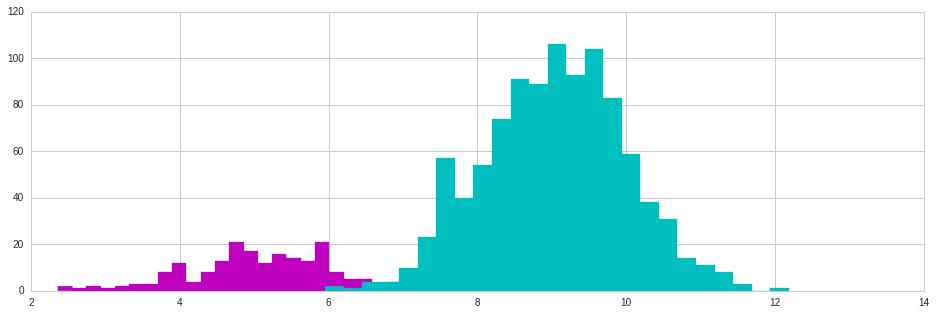

In [2]:
X = numpy.concatenate((numpy.random.randn(200) + 5, numpy.random.randn(1000) + 9))
y = numpy.concatenate((numpy.zeros(200), numpy.ones(1000)))
i = numpy.arange(1200)
numpy.random.shuffle(i)
X = X[i]
y = y[i]

plt.figure( figsize=(16, 5))
plt.hist(X[y==0], bins=25, color='m', edgecolor='m')
plt.hist(X[y==1], bins=25, color='c', edgecolor='c')
plt.show()

Naive Bayes can act as a supervised version of Gaussian Mixture Models. A GMM could be applied to the unlabelled data similarly to the previous GMM notebook. However, if we have known labels, we don't need to use the EM algorithm. We can just give the components and fit them directly using MLE.

This can be done either by passing in a constructor of a distribution or a list of the actual models. Lets see the constructor method first.

In [3]:
clf = NaiveBayes( NormalDistribution )
clf.fit( X, y )
clf.predict_proba( X[:10] )

array([[ 0.00000109,  0.99999891],
       [ 0.00010142,  0.99989858],
       [ 0.00004986,  0.99995014],
       [ 0.00000052,  0.99999948],
       [ 0.00000392,  0.99999608],
       [ 0.00000002,  0.99999998],
       [ 0.00000127,  0.99999873],
       [ 0.00000004,  0.99999996],
       [ 0.00012191,  0.99987809],
       [ 0.98133653,  0.01866347]])

Using this method we can pass in other arbitrary distributions and fit them. If we want to fit Poisson distributions instead of a Normal, all we have to do is pass in the Poisson constructor.

In [4]:
clf = NaiveBayes( PoissonDistribution )
clf.fit( X, y )
clf.predict_proba( X[:10] )

array([[ 0.03717218,  0.96282782],
       [ 0.06406046,  0.93593954],
       [ 0.05886067,  0.94113933],
       [ 0.0340015 ,  0.9659985 ],
       [ 0.04337448,  0.95662552],
       [ 0.02212743,  0.97787257],
       [ 0.03783927,  0.96216073],
       [ 0.02502925,  0.97497075],
       [ 0.06547776,  0.93452224],
       [ 0.27326096,  0.72673904]])

We can also pass in known distributions as a way to initialize it. We can either pass in a weight vector corresponding to the prior probability of each model, or assume they are equally likely and not pass in anything.

In [5]:
clf = NaiveBayes([NormalDistribution(5, 1), NormalDistribution(9,1)])
clf.predict_proba( X[:10] )

array([[ 0.00001824,  0.99998176],
       [ 0.00097656,  0.99902344],
       [ 0.00052185,  0.99947815],
       [ 0.00000959,  0.99999041],
       [ 0.00005579,  0.99994421],
       [ 0.00000044,  0.99999956],
       [ 0.00002075,  0.99997925],
       [ 0.00000107,  0.99999893],
       [ 0.00114889,  0.99885111],
       [ 0.99271239,  0.00728761]])

We can also fit to the data to refine the model.

In [6]:
clf.fit( X, y )
clf.predict_proba( X[:10] )

array([[ 0.00000109,  0.99999891],
       [ 0.00010142,  0.99989858],
       [ 0.00004986,  0.99995014],
       [ 0.00000052,  0.99999948],
       [ 0.00000392,  0.99999608],
       [ 0.00000002,  0.99999998],
       [ 0.00000127,  0.99999873],
       [ 0.00000004,  0.99999996],
       [ 0.00012191,  0.99987809],
       [ 0.98133653,  0.01866347]])

We're getting back what we had initially. When we fit we're overriding the distributions with the MLE estimates from the data.

However, since Naive Bayes can theoretically use any model which has a fit method and a predict probability method, so can you in pomegranate! Bayesian Networks, hidden Markov models, markov chains, and distributions can all be used. For example, we can compare a 0th order Markov chain to a 1st order Markov chain to see how much better one fits than the other.

In [7]:
a = MarkovChain([DiscreteDistribution({'A': 0.10, 'C': 0.40, 'G': 0.40, 'T': 0.10})])
b = MarkovChain([DiscreteDistribution({'A': 0.10, 'C': 0.40, 'G': 0.40, 'T': 0.10}),
                 ConditionalProbabilityTable([['A', 'A', 0.10],
                                              ['A', 'C', 0.50],
                                              ['A', 'G', 0.30],
                                              ['A', 'T', 0.10],
                                              ['C', 'A', 0.10],
                                              ['C', 'C', 0.40],
                                              ['C', 'T', 0.40],
                                              ['C', 'G', 0.10],
                                              ['G', 'A', 0.05],
                                              ['G', 'C', 0.45],
                                              ['G', 'G', 0.45],
                                              ['G', 'T', 0.05],
                                              ['T', 'A', 0.20],
                                              ['T', 'C', 0.30],
                                              ['T', 'G', 0.30],
                                              ['T', 'T', 0.20]])])

clf = NaiveBayes([a, b])
seqs = numpy.array(map(list, ['ACGATCGAAT', 'GAATTATGC', 'GAAATAAATAC']))

clf.predict_proba(seqs)

array([[ 0.98556304,  0.01443696],
       [ 0.37209302,  0.62790698],
       [ 0.28571429,  0.71428571]])

We can even compare a markov chain to a hidden Markov model. For this, lets look at the CG island detection problem. In essence, there are stretches of DNA which are highly enriched for the nucleotides C and G. However, they do include the nucleotides A and T, and so simply calling all C's and G's part of the islands like a GMM would is not useful. A HMM can model this through its underlying structure.Lets use a markov chain with a preference for staying in the CG states versus a hidden Markov model which is a basic CG-island finder.

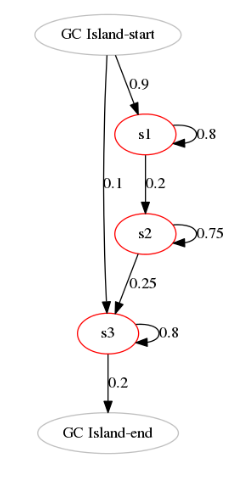

In [8]:
d1 = DiscreteDistribution({'A': 0.25, 'C': 0.25, 'G': 0.25, 'T': 0.25})
s1 = State(d1, name="s1")
s2 = State(DiscreteDistribution({'A': 0.10, 'C': 0.40, 'G': 0.40, 'T': 0.10}), name="s2")
s3 = State(d1, name="s3")

c = HiddenMarkovModel('GC Island')
c.add_states(s1, s2, s3)
c.add_transition( c.start, s1, 0.9 )
c.add_transition( c.start, s3, 0.1 )
c.add_transition( s1, s1, 0.80 )
c.add_transition( s1, s2, 0.20 )
c.add_transition( s2, s2, 0.75 )
c.add_transition( s2, s3, 0.25 )
c.add_transition( s3, s3, 0.80 )
c.add_transition( s3, c.end, 0.20 )
c.bake()

plt.figure( figsize=(4, 8) )
c.draw()

In [9]:
clf = NaiveBayes([b, c])
seqs = numpy.array(map(list, ['ACGATCGCGAGTGCCATTAT', 'GAATTACTAGATATGC', 'GAAACGGCGAGCATGGCTAAATAC']))

clf.predict_proba(seqs)

array([[ 0.00208704,  0.99791296],
       [ 0.37714684,  0.62285316],
       [ 0.10567194,  0.89432806]])

We can see that the HMM performs better in all three cases, but in one only slightly better. This could be because the markov chain values were initialized without much thought and there is a much better way to do it. Or it could be because HMMs are a much better tool to do this type of prediction.

Naive Bayes models have the same methods as the other models, aka fit, predict, summarize, from_summaries, predict_proba, and predict_log_proba. Lets look at it summarizing batches of 500 sequences for two Markov chains. Obviously this is a very simple example, but it's illustrative of the flexibility of the API. These sequences can be of any length, but we randomly generate a matrix for brevity.

In [10]:
a = MarkovChain([DiscreteDistribution({'A': 0.10, 'C': 0.40, 'G': 0.40, 'T': 0.10})])
b = MarkovChain([DiscreteDistribution({'A': 0.10, 'C': 0.40, 'G': 0.40, 'T': 0.10}),
                 ConditionalProbabilityTable([['A', 'A', 0.10],
                                              ['A', 'C', 0.50],
                                              ['A', 'G', 0.30],
                                              ['A', 'T', 0.10],
                                              ['C', 'A', 0.10],
                                              ['C', 'C', 0.40],
                                              ['C', 'T', 0.40],
                                              ['C', 'G', 0.10],
                                              ['G', 'A', 0.05],
                                              ['G', 'C', 0.45],
                                              ['G', 'G', 0.45],
                                              ['G', 'T', 0.05],
                                              ['T', 'A', 0.20],
                                              ['T', 'C', 0.30],
                                              ['T', 'G', 0.30],
                                              ['T', 'T', 0.20]])])

clf = NaiveBayes([a, b])

dna = 'ACGT'
for i in range(100):
    seqs = numpy.random.randint(0, 4, (500, 50))
    seqs = numpy.array([[dna[i] for i in seq] for seq in seqs])
    y = numpy.concatenate((numpy.ones(100), numpy.zeros(400)))
    clf.summarize(seqs, y)

clf.from_summaries()

We can check the underlying distributions to see if they were properly updated.

In [15]:
print "Chain 1 Distribution 1"
print clf.models[0].distributions[0]
print
print "Chain 2 Distribution 1"
print clf.models[1].distributions[0]
print
print "Chain 2 Distribution 2"
print clf.models[1].distributions[1]
print
print "Priors"
print clf.weights

Chain 1 Distribution 1
{
    "frozen" :false,
    "class" :"Distribution",
    "parameters" :[
        {
            "A" :0.2494635,
            "C" :0.25015850000000001,
            "T" :0.25011800000000001,
            "G" :0.25025999999999998
        }
    ],
    "name" :"DiscreteDistribution"
}

Chain 2 Distribution 1
{
    "frozen" :false,
    "class" :"Distribution",
    "parameters" :[
        {
            "A" :0.24709999999999999,
            "C" :0.2596,
            "T" :0.2414,
            "G" :0.25190000000000001
        }
    ],
    "name" :"DiscreteDistribution"
}

Chain 2 Distribution 2
T	T	0.250791676554
T	G	0.250047050545
T	C	0.249793386739
T	A	0.249367886162
G	T	0.24863894217
G	G	0.250973350202
G	C	0.251324327633
G	A	0.249063379994
C	G	0.251796687421
C	T	0.24950148537
C	C	0.249932853131
C	A	0.248768974077
A	T	0.24965893588
A	G	0.247371559745
A	C	0.251251929974
A	A	0.251717574401

Priors
[ 0.8  0.2]


We can see that they've all normalized to basically a uniform distribution, which makes sense because that's the distribution that the data was generated from.